In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('retailer_wise_lati_long_radious_explore.csv')

In [3]:
df.sample()

,retailer_code,contact_date,campaign_id,actual_latitude,actual_longitude,contact_latitude,contact_longitude,radius
20829,DHK-02-06494,2022-08-04,2,24.030809,90.265121,24.032036,90.263618,1700.0


In [4]:
df.shape

(47765, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47765 entries, 0 to 47764
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   retailer_code      47765 non-null  object 
 1   contact_date       47765 non-null  object 
 2   campaign_id        47765 non-null  int64  
 3   actual_latitude    47378 non-null  float64
 4   actual_longitude   47378 non-null  float64
 5   contact_latitude   47765 non-null  float64
 6   contact_longitude  47765 non-null  float64
 7   radius             47765 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.9+ MB


In [6]:
df.isnull().sum()

retailer_code          0
contact_date           0
campaign_id            0
actual_latitude      387
actual_longitude     387
contact_latitude       0
contact_longitude      0
radius                 0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df

,retailer_code,contact_date,campaign_id,actual_latitude,actual_longitude,contact_latitude,contact_longitude,radius
0,DHK-08-16681,2022-08-07,2,24.008938,90.248245,24.008778,90.248244,26.135
1,DHK-01-08517,2022-08-07,23,23.805218,90.388107,23.805539,90.387858,49.909
2,SYL-13-04865,2022-08-07,23,25.124409,90.677483,25.124479,90.677191,53.158
3,RAJ-31-07534,2022-08-07,23,24.510532,88.472908,24.510483,88.471550,40.275
4,KHU-50-08888,2022-08-07,23,23.527336,89.592117,23.527221,89.590834,172.100
...,...,...,...,...,...,...,...,...
47760,DHK-01-25524,2022-08-07,2,23.749147,90.426376,23.747251,90.426965,24.055
47761,RAJ-34-03661,2022-08-07,20,25.569572,89.275040,25.569513,89.275177,35.182
47762,DHK-01-25524,2022-08-07,20,23.749147,90.426376,23.747251,90.426965,24.055
47763,RAJ-34-03661,2022-08-07,2,25.569572,89.275040,25.569529,89.275266,47.669


In [9]:
df['retailer_code'].value_counts()

SYL-18-00074    9
SYL-18-10217    9
DHK-04-02616    8
DHK-06-06132    8
DHK-06-03704    8
               ..
CTG-23-06461    1
DHK-02-13001    1
RAJ-32-03041    1
CTG-23-09849    1
CTG-28-02174    1
Name: retailer_code, Length: 20045, dtype: int64

In [10]:
features=['radius']
X=df[features]
y=df.retailer_code

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (37902, 1) (37902,)
Test set: (9476, 1) (9476,)


In [12]:
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.18319966230476994, 0.13750527648796962, 0.09835373575348248, 0.07133811734909244, 0.05265934993668214, 0.03957365977205572, 0.03292528493035036, 0.027859856479527226, 0.023744195863233432, 0.02005065428450823, 0.016884761502743775, 0.01487969607429295, 0.012980160405234276, 0.011819333051920641, 0.01044744617982271, 0.009603208104685521, 0.008653440270156184, 0.00823132123258759, 0.007809202195018995, 0.007176023638666104, 0.0069649641198818064, 0.006226255804136767, 0.006226255804136767, 0.0059096665259603205, 0.005487547488391726]


Text(0, 0.5, 'Testing Accuracy')

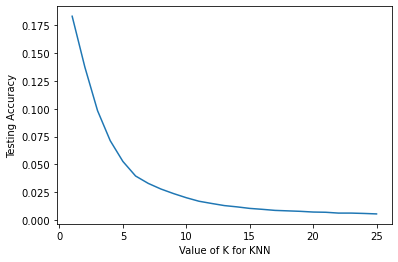

In [13]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [14]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [15]:
predictions = neigh.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report:
                precision    recall  f1-score   support

 CTG-20-00002       0.00      0.00      0.00         1
 CTG-20-00016       0.00      0.00      0.00         2
 CTG-20-00024       0.25      1.00      0.40         1
 CTG-20-00027       0.00      0.00      0.00         0
 CTG-20-00039       0.00      0.00      0.00         1
 CTG-20-00041       0.00      0.00      0.00         0
 CTG-20-00192       0.50      1.00      0.67         1
 CTG-20-00195       0.00      0.00      0.00         1
 CTG-20-00212       0.00      0.00      0.00         1
 CTG-20-00213       0.00      0.00      0.00         1
 CTG-20-00223       0.00      0.00      0.00         1
 CTG-20-00224       0.00      0.00      0.00         0
 CTG-20-00230       0.00      0.00      0.00         0
 CTG-20-00243       0.00      0.00      0.00         1
 CTG-20-00245       0.00      0.00      0.00         0
 CTG-20-00252       0.00      0.00      0.00         2
 CTG-20-00256       0.00      0.00      

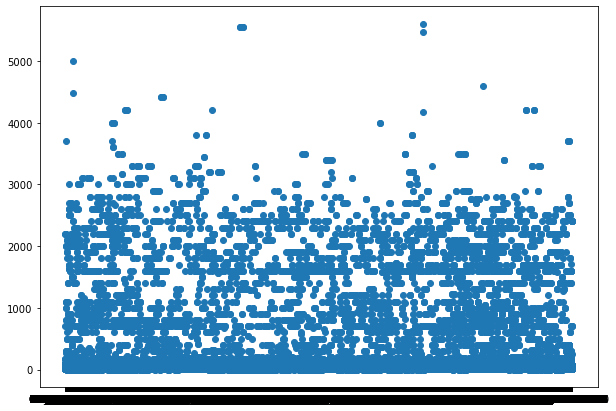

In [16]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['retailer_code'], df['radius'])

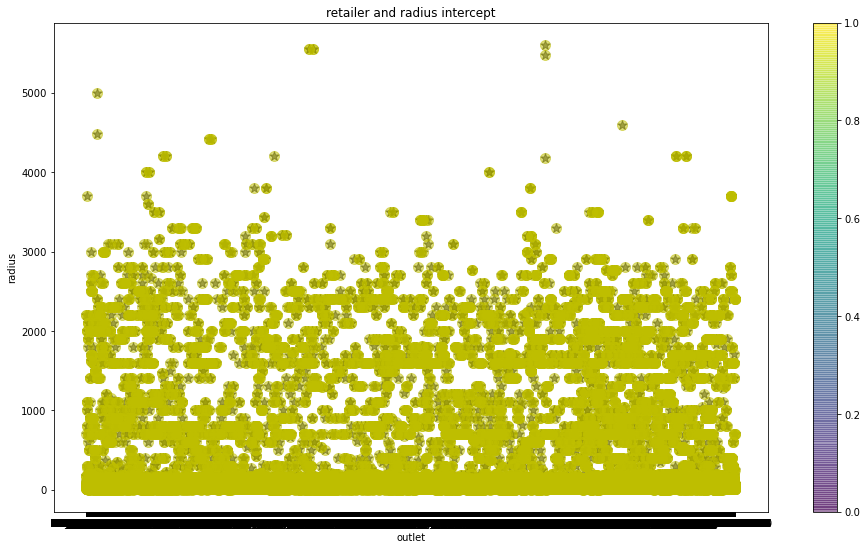

In [18]:
x = df["retailer_code"]
y = df["radius"]

plt.figure(figsize=(16,9))

plt.scatter(x,y , color = "k" , marker= "*", alpha= 0.5,s = 100 )

x = df["retailer_code"]
y = df["radius"]

plt.scatter(x,y , color = "y" , marker= "o", alpha= 0.5,s = 100 )


plt.title("retailer and radius intercept")
plt.xlabel("outlet")
plt.ylabel("radius")
plt.colorbar()
plt.show()